In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

sys.path.append(os.path.join(os.getcwd(), os.pardir))
from plotting.plot import colorPanel, loader, stick
from plotting import cd
from plotting import baseline_logger as bl

%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

In [15]:
# Plot according to args

def smooth_reward_curve(x, y):
    halfwidth = min(31, int(np.ceil(len(x)/30))) # Halfwidth of our smoothing convolution
    k = halfwidth
    xsmoo = x[k:-k]
    ysmoo = np.convolve(y, np.ones(2*k+1), mode='valid') / np.convolve(np.ones_like(y), np.ones(2*k+1), mode='valid')
    downsample = max(int(np.floor(len(xsmoo)/1e3)),1)
    return xsmoo[::downsample], ysmoo[::downsample]


def plotArg(env_id, ax):
    game = env_id
    # mLoder = loader.loader(args[2], args[3], args[4])
    # datas = mLoder.load(args[0])
    keys = [
        'TimestepsSoFar',
        'EpRewMean',
        'TimeElapsed',
        # 'OptTimeSoFar',
    ]
    
    colors = colorPanel.colorPanel(1).getColors()

    for i in range(0, 2):
        if i > 0:
            if env_id == 'Humanoid':
                datas = bl.obtain_stats(prefix='/Users/jiaming/atlas/exps', criterion='ppo-sgd/' + env_id + '-v1/l-0.0001-b-2048', keys=keys)
            else:
                datas = bl.obtain_stats(prefix='/Users/jiaming/atlas/exps', criterion='ppo-sgd/' + env_id + '-v1/l-0.0003-b-2048', keys=keys)
            label = 'PPOSGD'
        else:
            if env_id == 'Humanoid':
                datas = bl.obtain_stats(prefix='/Users/jiaming/atlas/exps', criterion='ppo-kfac/' + env_id + '-v1/l-0.01-k-0.002-u-1-b-2048', keys=keys)
            else:
                datas = bl.obtain_stats(prefix='/Users/jiaming/atlas/exps', criterion='ppo-kfac/' + env_id + '-v1/l-0.03-k-0.002-u-1-b-2048', keys=keys)
            label = 'ACKTR'
            
        x = datas['TimestepsSoFar']
        y = datas['EpRewMean']
        
        x = x[0]
        y_mean = y[0]
        y_std = y[1]
        
        xx = x
        x, y_mean = smooth_reward_curve(xx, y_mean)
        x, y_std = smooth_reward_curve(xx, y_std)
        x = x * 1e7 / np.max(x)
        # label, x, y_mean, y_std = datas[i]

#         tmp = label.split('_')
#         if len(tmp) == 2:
#             label = tmp[-1]
#         else:
#             label = '%s (%s)' % (tmp[-2], tmp[-1])
        if i > 0:
            color = colors[4]
        else:    
            color = colors[i]     
        y_upper = y_mean + y_std
        y_lower = y_mean - y_std
        ax.fill_between(
            x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
        )
        line = ax.plot(x, list(y_mean), label=label, color=color, rasterized=True)          

    stick.cutsomStick(game, 'timesteps', ax)
    if args == 'Reacher':
        ax.set_ylim(-10, 0)

HalfCheetah
Walker2d
Hopper
Reacher


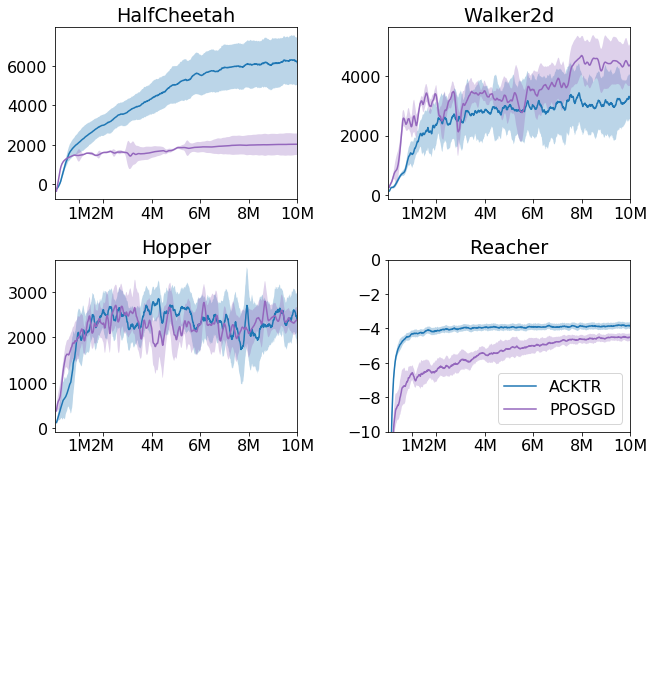

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
columns = 2
sixAtariGames = [
    'HalfCheetah', 'Walker2d', 'Hopper', 'Reacher'
    # 'Humanoid'
#         ['data/BeamRider', 'BeamRider', 'timesteps', 10000, 40e6, 1],
#         ['data/Breakout', 'Breakout', 'timesteps', 10000, 40e6, 1],
#         ['data/Pong', 'Pong', 'timesteps', 10000, 40e6, 1],
#         ['data/Qbert', 'Qbert', 'timesteps', 10000, 40e6, 1],
#         ['data/Seaquest', 'Seaquest', 'timesteps', 10000, 40e6, 1],
#         ['data/SpaceInvaders', 'SpaceInvaders', 'timesteps', 10000, 40e6, 1]
]

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')


for i, args in enumerate(sixAtariGames):
    print(args)
    ax = fig.add_subplot(len(sixAtariGames) / columns + 1, columns, i + 1)
    plotArg(args, ax)

plt.legend(loc=4)

# ax.set_xlabel('Number of Timesteps')
# ax.set_ylabel('Episode Rewards')

fig.tight_layout()
fig.savefig('acktr-ppo.pdf', dpi=300)

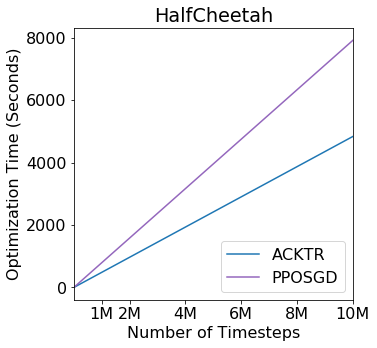

In [8]:
def plotArg(env_id, ax):
    game = env_id
    
    colors = colorPanel.colorPanel(1).getColors()

    for i in range(0, 2):
        if i > 0:
            y = [0, 7912]
            label = 'PPOSGD'
        else:
            y = [0, 4834]
            label = 'ACKTR'
        
        x = [0, 1e7]
        
        if i > 0:
            color = colors[4]
        else:    
            color = colors[i]     
#         y_upper = y_mean + y_std
#         y_lower = y_mean - y_std
#         ax.fill_between(
#             x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
#         )
        line = ax.plot(x, list(y), label=label, color=color, rasterized=True)          

    stick.cutsomStick(game, 'timesteps', ax)
    
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plotArg('HalfCheetah', ax)
plt.legend(loc=4)
plt.xlabel('Number of Timesteps')
plt.ylabel('Optimization Time (Seconds)')
fig.savefig('acktr-ppo-t.pdf', dpi=300)